# Laboratory Work #5 "Image processing with the OpenCV library and working with the bunch of digital image file"
## Executed by student of group KN-222b.e. Miniailo Dmytro

**Objective:** Learning OpenCV library methods for working with image files

#### Libraries used in the tasks

In [4]:
import cv2
import os
import glob
import random
import base64
import pandas as pd
import numpy as np
from PIL import Image
from IPython.display import HTML
from io import BytesIO

#### 1. Create a function that takes the path to a folder on disk as an argument and returns a dataframe with the following information about the images in the folder:
- file name
- color model
- format
- the number of channels in the image
- file size in megabytes, rounded to two decimal places
- image width
- image height
- full pate to the file
- image thumbnail

In [6]:
def to_dataframe(folder_path):
    images_data = []
    files = glob.glob(os.path.join(folder_path, '*'))

    for file_path in files:
        try:
            with Image.open(file_path) as img:
                thumbnail = img.copy()
                thumbnail.thumbnail((100, 100))
                
                images_data.append({
                    'name': os.path.basename(file_path),
                    'color model': img.mode,
                    'format': img.format,
                    'channels': len(img.getbands()),
                    'size': round(os.path.getsize(file_path) / (1024 * 1024), 2),
                    'width': img.size[0],
                    'height': img.size[1],
                    'full path': os.path.abspath(file_path),
                    'image': thumbnail
                })
        except (IOError, OSError):
            pass

    df = pd.DataFrame(images_data)
    return df

In [7]:
def image_base64(img):
    if isinstance(img, str):
        img = get_thumbnail(img)
    
    if img.mode == 'RGBA':
        img = img.convert('RGB')
    
    with BytesIO() as buffer:
        img.save(buffer, 'JPEG')
        return base64.b64encode(buffer.getvalue()).decode()

def get_thumbnail(img_path):
    with Image.open(img_path) as img:
        img.thumbnail((100, 100))
        return img.copy()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

In [8]:
dff = to_dataframe(r"E:\Documents Dmytro\Programming\KhPI\Python\Lab5\images2")

,name,color model,format,channels,size,width,height,full path,image
0,1.png,RGBA,PNG,4,0.70,967,601,E:\Documents Dmytro\Programming\KhPI\Python\Lab5\images2\1.png,
1,2.jpeg,RGB,JPEG,3,0.05,718,750,E:\Documents Dmytro\Programming\KhPI\Python\Lab5\images2\2.jpeg,
2,2.PNG,RGBA,PNG,4,0.47,716,450,E:\Documents Dmytro\Programming\KhPI\Python\Lab5\images2\2.PNG,
3,3.jpg,RGB,JPEG,3,0.06,730,411,E:\Documents Dmytro\Programming\KhPI\Python\Lab5\images2\3.jpg,
4,4.jpg,RGB,JPEG,3,0.03,700,394,E:\Documents Dmytro\Programming\KhPI\Python\Lab5\images2\4.jpg,
5,5.jpg,RGB,JPEG,3,0.04,700,394,E:\Documents Dmytro\Programming\KhPI\Python\Lab5\images2\5.jpg,
6,6.jpg,RGB,JPEG,3,0.07,800,533,E:\Documents Dmytro\Programming\KhPI\Python\Lab5\images2\6.jpg,
7,8.PNG,RGBA,PNG,4,0.56,960,463,E:\Documents Dmytro\Programming\KhPI\Python\Lab5\images2\8.PNG,
8,9.PNG,RGBA,PNG,4,0.21,578,372,E:\Documents Dmytro\Programming\KhPI\Python\Lab5\images2\9.PNG,

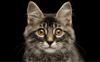
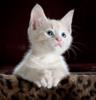
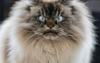
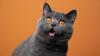
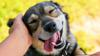
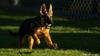
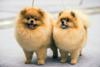
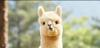
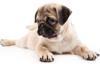

In [9]:
HTML(dff.to_html(formatters={'image': image_formatter}, escape=False))

#### 2. Create a poster from the images in the folder using the OpenCV library

##### Create a function that takes following arguments and returns the poster image. 
- the path to the folder;
- name of output image file;
- the number of images in a row;
- the number of images in a column

In [12]:
def to_poster(source_dir, output_filename, rows, cols, cell_size=250):
    # Calculate overall poster dimensions
    width = cols * cell_size
    height = rows * cell_size
    poster = Image.new('RGB', (width, height))
    
    # Get list of image files in the source directory
    image_files = glob.glob(os.path.join(source_dir, '*'))
    
    # Iterate through each cell in the grid
    for row_index in range(rows):
        for col_index in range(cols):
            # Select a random image for the current cell
            selected_file = random.choice(image_files)
            try:
                with Image.open(selected_file) as img:
                    processed_img = resize_and_crop(img, cell_size)
                    processed_img = apply_random_color_tint(processed_img)
                    
                    # Calculate paste position
                    x_offset = col_index * cell_size
                    y_offset = row_index * cell_size
                    
                    # Paste the processed image onto the poster
                    poster.paste(processed_img, (x_offset, y_offset))
            except (IOError, OSError):
                # Skip images that cannot be opened
                continue
    
    poster.save(output_filename)
    return poster

##### Create a function that converts the picture into a square

In [14]:
def resize_and_crop(img, target_size=500):
    original_width, original_height = img.size
    # Determine the size of the square region
    square_side = min(original_width, original_height)
    
    # Calculate cropping box coordinates
    left_edge = (original_width - square_side) // 2
    top_edge = (original_height - square_side) // 2
    right_edge = left_edge + square_side
    bottom_edge = top_edge + square_side
    
    # Crop and resize the image
    cropped_img = img.crop((left_edge, top_edge, right_edge, bottom_edge))
    return cropped_img.resize((target_size, target_size), Image.Resampling.LANCZOS)

##### "Filter" the image with red, green, blue, yellow, magenta, or cyan colors

In [16]:
def apply_random_color_tint(img):
    img_array = np.array(img)
    # Define RGB filters
    color_tints = {
        'red': [1, 0, 0],
        'green': [0, 1, 0],
        'blue': [0, 0, 1],
        'yellow': [1, 1, 0],
        'magenta': [1, 0, 1],
        'cyan': [0, 1, 1]
    }
    selected_tint = random.choice(list(color_tints.values()))
    
    # Apply the selected tint to each RGB channel
    for channel in range(3):
        img_array[:, :, channel] = img_array[:, :, channel] * selected_tint[channel]
    
    return Image.fromarray(img_array)

#### Let's create some posters

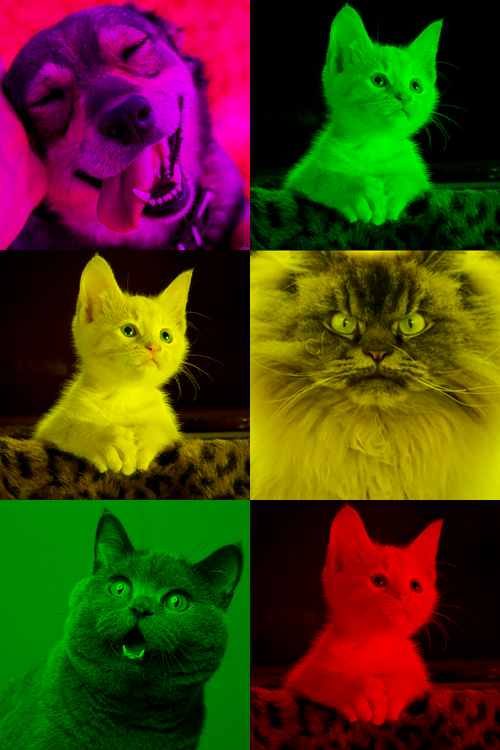

In [18]:
img = to_poster(r"E:\Documents Dmytro\Programming\KhPI\Python\Lab5\images2", "Poster1.jpg", 3, 2)
img

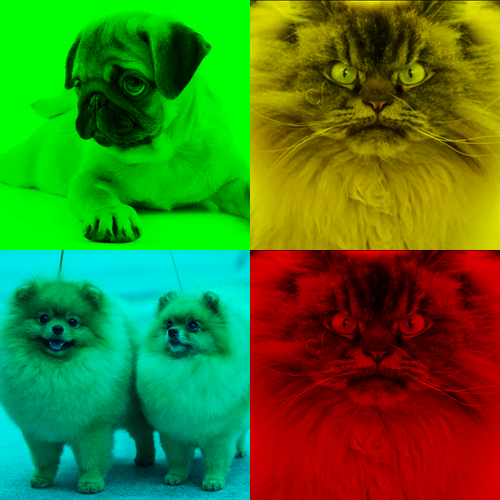

In [19]:
img = to_poster(r"E:\Documents Dmytro\Programming\KhPI\Python\Lab5\images2", "Poster2.jpg", 2, 2)
img

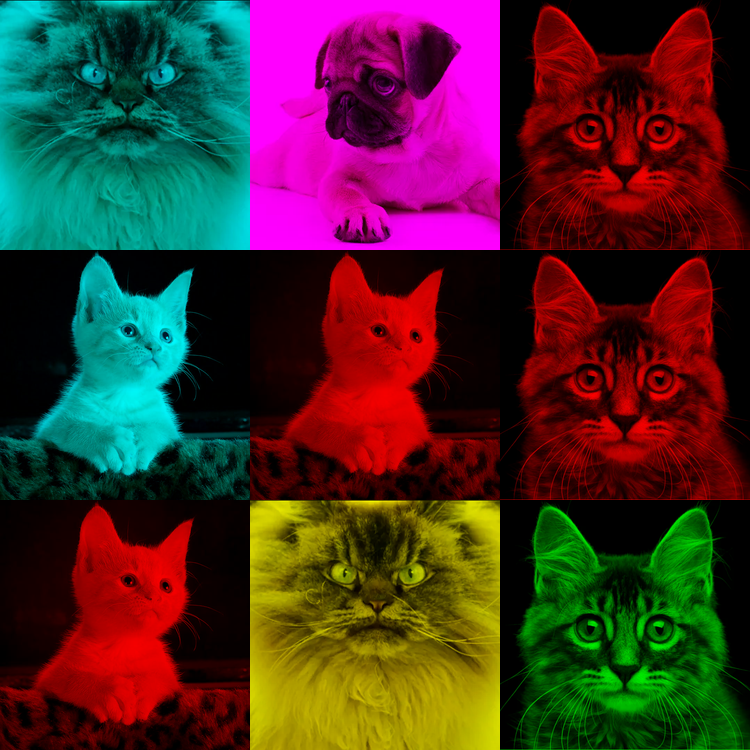

In [20]:
img = to_poster(r"E:\Documents Dmytro\Programming\KhPI\Python\Lab5\images2", "Poster3.jpg", 3, 3)
img

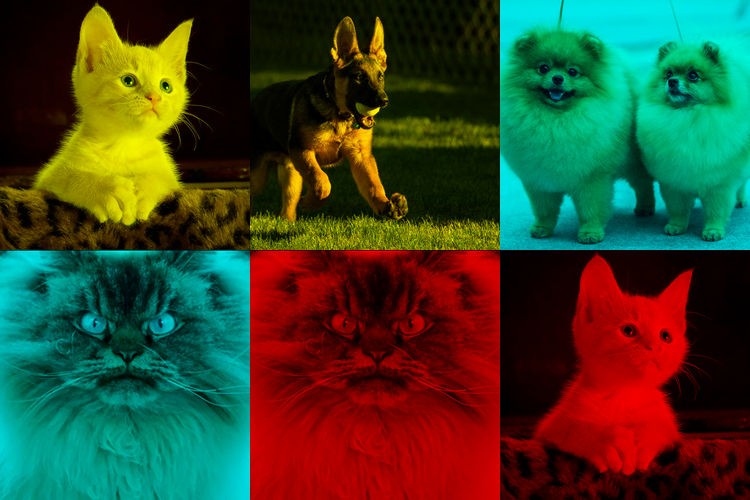

In [21]:
img = to_poster(r"E:\Documents Dmytro\Programming\KhPI\Python\Lab5\images2", "Poster4.jpg", 2, 3)
img

**Conclusion:** During this laboratory work, I was gaining skills in image processing using OpenCV library.